<a href="https://colab.research.google.com/github/pranay-343/verana_health_assesment-/blob/main/Verana_health_Assesment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fetching Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [ ]:
patient_clinical_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Verana Health/data_split/patient_clinical.csv')
patient_demographics_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Verana Health/data_split/patient_demographics.csv')
patient_history_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Verana Health/data_split/patient_history.csv')
patient_note_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Verana Health/data_split/patient_note_2.csv')

Question 1 : Spend some time exploring the data and show or discuss what you find. What are the
types of data quality issues you will have to consider?


This dataset contains missing values and if EHR data contains substantial missing information that if left unaddressed could reduce the validity of conclusions drawn. Properly addressing the missing data issue in EHR data is complicated by the fact that it is sometimes difficult to differentiate between missing data and a negative value.Missing data can reduce the statistical power of a study and can produce biased estimates, leading to invalid conclusions.

Checking for Missing data in each dataset

In [ ]:
patient_clinical_df.head()

,patient_id,diagnosis_code,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,KTL2DSJHL4SDNB9542T487EN4,719520001,195.0,106.0,70.0,26.97,80.0,77.0,0
1,EJWLMX3E4GUHSZJHNSY8ZQA9F,763387005,250.0,121.0,81.0,28.73,95.0,76.0,0
2,4P9XZP35HB43N2LN6SNYCTQ6C,231996009,245.0,127.5,80.0,25.34,75.0,70.0,0
3,2C24GKDFF9LYAADZNDJ4UMCLH,312921000,225.0,150.0,95.0,28.58,65.0,103.0,1
4,WCYHBETYRVUD4ATKEXDEPQ9UW,H35.35,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
print("Missing values in every columns in patient_clinical table:")
patient_clinical_df.isnull().sum()

Missing values in every columns in patient_clinical table:


patient_id          0
diagnosis_code    287
totChol            50
sysBP               0
diaBP               0
BMI                19
heartRate           1
glucose           386
TenYearCHD          0
dtype: int64

In [ ]:
patient_demographics_df.head()

,patient_id,male,age,education
0,KTL2DSJHL4SDNB9542T487EN4,1,39,4.0
1,EJWLMX3E4GUHSZJHNSY8ZQA9F,0,46,2.0
2,4P9XZP35HB43N2LN6SNYCTQ6C,1,48,1.0
3,2C24GKDFF9LYAADZNDJ4UMCLH,0,61,3.0
4,WCYHBETYRVUD4ATKEXDEPQ9UW,0,46,3.0


In [ ]:
print("Missing values in every columns in patient_demographics table:")
patient_demographics_df.isnull().sum()

Missing values in every columns in patient_demographics table:


patient_id      0
male            0
age             0
education     105
dtype: int64

In [ ]:
patient_history_df.head()

,patient_id,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes
0,ZKFEHEA2YVD6E5HRJKVWWCU9P,0,0.0,0.0,0,0,0
1,V7NNJV6JVBEW2AGXJ826HQJGM,1,15.0,0.0,0,1,0
2,K3FVYMBPSVCHDSYJ3XS9GRLJX,0,0.0,1.0,0,1,0
3,S5GX8TACV8LZQHJAAR97ZDLD4,1,9.0,0.0,0,0,0
4,J36F2BMH8ZLFSDC4V48CY7974,1,20.0,0.0,0,1,0


In [ ]:
print("Missing values in every columns in patient_history table:")
patient_history_df.isnull().sum()

Missing values in every columns in patient_history table:


patient_id          0
currentSmoker       0
cigsPerDay         29
BPMeds             53
prevalentStroke     0
prevalentHyp        0
diabetes            0
dtype: int64

In [ ]:
patient_note_df.head()

,patient_id,Note
0,E93UGY2VH6E57HFKJVN9CDHL8,we discussed smoking and family history and I ...
1,L4THW2UC3JTGA592ZEPPSCWCJ,we discussed smoking and family history and I ...
2,9TB3L57J9RRBGS57RPVDHB6UB,patient reports fluttering and irregular pain
3,RRVZHGSW8TYXQH9JZNUJBJS3L,PRO: tightness in chest
4,9ZF2PDLK987YFEBQXG92KPPQS,patient reports pain in foot but otherwise say...


In [ ]:
print("Missing values in every columns in patient_notes table:")
patient_note_df.isnull().sum()

Missing values in every columns in patient_notes table:


patient_id    0
Note          0
dtype: int64

In [ ]:
#Merging patient_clinical_df , patient_history_df and patient_demographics_df into a single dataframe to create a single dataframe
df1 = patient_history_df.merge(patient_clinical_df, on='patient_id')
df2 = df1.merge(patient_demographics_df, on='patient_id')
df2.head()

,patient_id,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,diagnosis_code,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,male,age,education
0,ZKFEHEA2YVD6E5HRJKVWWCU9P,0,0.0,0.0,0,0,0,232051002,247.0,131.0,88.0,27.64,72.0,61.0,0,0,43,2.0
1,V7NNJV6JVBEW2AGXJ826HQJGM,1,15.0,0.0,0,1,0,232050001,294.0,142.0,94.0,26.31,98.0,64.0,0,1,46,1.0
2,K3FVYMBPSVCHDSYJ3XS9GRLJX,0,0.0,1.0,0,1,0,193410003,332.0,124.0,88.0,31.31,65.0,84.0,0,0,41,3.0
3,S5GX8TACV8LZQHJAAR97ZDLD4,1,9.0,0.0,0,0,0,70099003,226.0,114.0,64.0,22.35,85.0,NaN,0,0,39,2.0
4,J36F2BMH8ZLFSDC4V48CY7974,1,20.0,0.0,0,1,0,719431007,221.0,140.0,90.0,21.35,95.0,70.0,1,0,38,2.0


Box Plots to analyse pattern or relation in the patients health conditions

Diastolic blood pressure level by Prevalent Hyp - Patient with prevalent hyp has higher level of blood pressure as compared to other.

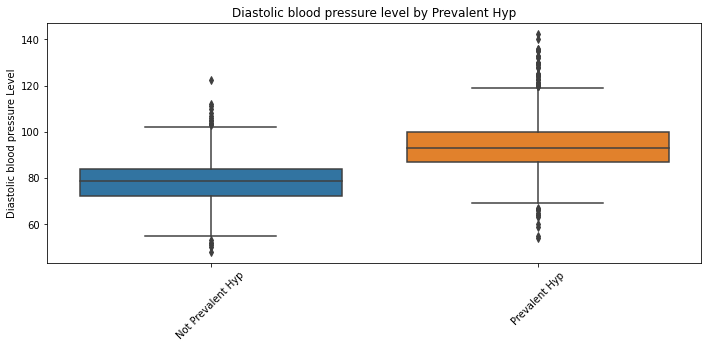

In [ ]:
fig = plt.figure(figsize =(10, 5))
ax = sns.boxplot(x=df2["prevalentHyp"],y=df2["diaBP"])
plt.xticks(rotation=45)
plt.ylabel("Diastolic blood pressure Level")
xlables = ["Not Prevalent Hyp","Prevalent Hyp"] 
ax.set_xticklabels(xlables, rotation=45)
plt.title('Diastolic blood pressure level by Prevalent Hyp', fontsize=12)
plt.rcParams.update({'font.size': 12})
plt.xlabel('')
plt.tight_layout()
plt.show() 

Systolic blood pressure level by Prevalent Hyp - Patient with prevalent hyp has higher level of systolic pressure as compared to other.

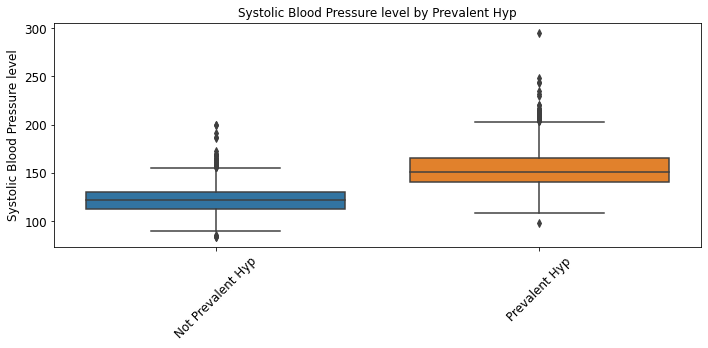

In [ ]:
fig = plt.figure(figsize =(10, 5))
ax = sns.boxplot(x=df2["prevalentHyp"],y=df2["sysBP"])
plt.xticks(rotation=45)
plt.ylabel("Systolic Blood Pressure level")
xlables = ["Not Prevalent Hyp","Prevalent Hyp"] 
ax.set_xticklabels(xlables, rotation=45)
plt.title('Systolic Blood Pressure level by Prevalent Hyp', fontsize=12)
plt.rcParams.update({'font.size': 12})
plt.xlabel('')
plt.tight_layout()
plt.show() 

Glucose level by diabetic condition - Patient with diabetes have higher level of glucose as compared to other.

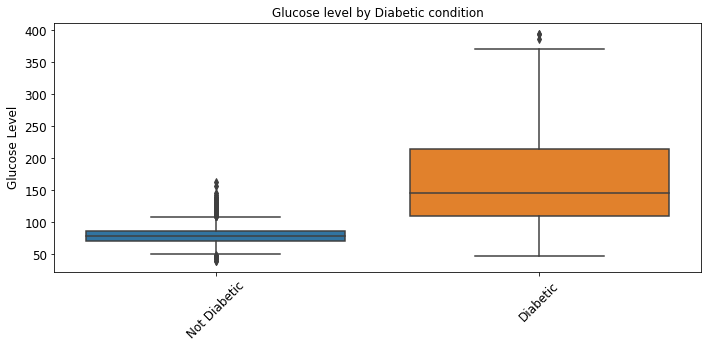

In [ ]:
fig = plt.figure(figsize =(10, 5))
ax = sns.boxplot(x=df2["diabetes"],y=df2["glucose"])
plt.xticks(rotation=45)
plt.ylabel("Glucose Level")
xlables = ["Not Diabetic","Diabetic"] 
ax.set_xticklabels(xlables, rotation=45)
plt.title('Glucose level by Diabetic condition', fontsize=12)
plt.rcParams.update({'font.size': 12})
plt.xlabel('')
plt.tight_layout()
plt.show() 

Systolic blood pressure level by Prevalent Stroke - Patient with prevalent stroke has higher level of systolic blood pressure as compared to other. Also there are some outliers present in the data for systolic blood pressure level.

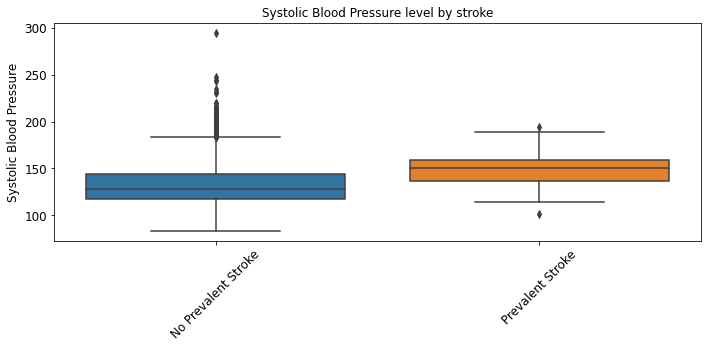

In [ ]:
fig = plt.figure(figsize =(10, 5))
ax = sns.boxplot(x=df2["prevalentStroke"],y=df2["sysBP"])
plt.xticks(rotation=45)
plt.ylabel("Systolic Blood Pressure")
xlables = ["No Prevalent Stroke","Prevalent Stroke"] 
ax.set_xticklabels(xlables, rotation=45)
plt.title('Systolic Blood Pressure level by stroke', fontsize=12)
plt.rcParams.update({'font.size': 12})
plt.xlabel('')
plt.tight_layout()
plt.show() 

Diastolic blood pressure level by Prevalent Stroke - Patient with prevalent stroke has higher level of diastolic blood pressure as compared to other. Also there are some outliers present in the data for systolic blood pressure level.

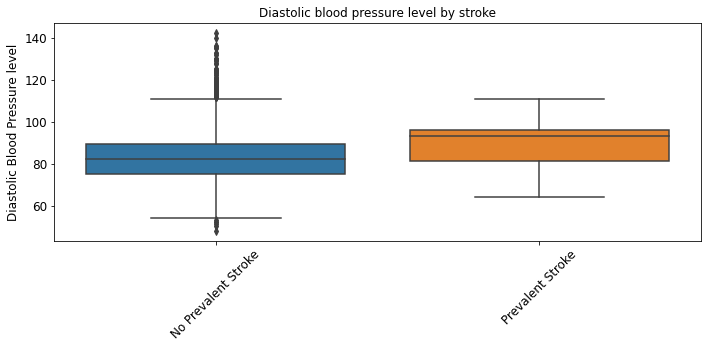

In [ ]:
fig = plt.figure(figsize =(10, 5))
ax = sns.boxplot(x=df2["prevalentStroke"],y=df2["diaBP"])
plt.xticks(rotation=45)
plt.ylabel("Diastolic Blood Pressure level")
xlables = ["No Prevalent Stroke","Prevalent Stroke"] 
ax.set_xticklabels(xlables, rotation=45)
plt.title('Diastolic blood pressure level by stroke', fontsize=12)
plt.rcParams.update({'font.size': 12})
plt.xlabel('')
plt.tight_layout()
plt.show()    

Density Distribution Plot of total Cholestrol value by prevalent stroke

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


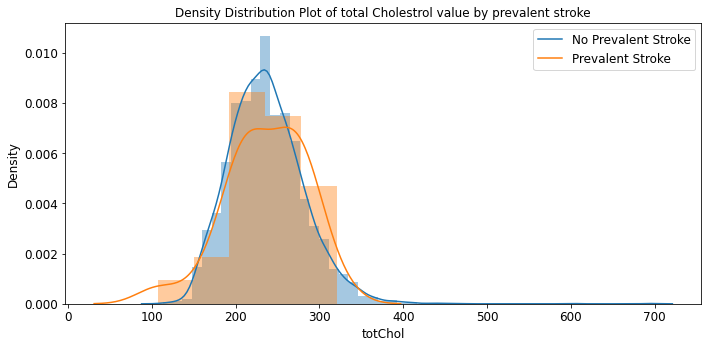

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.distplot(df2[df2['prevalentStroke'] == 0]['totChol'], kde_kws={"label": "No Prevalent Stroke"})
sns.distplot(df2[df2['prevalentStroke'] == 1]['totChol'], kde_kws={"label": "Prevalent Stroke"})
plt.rcParams.update({'font.size': 12})
plt.legend(loc=0,fontsize=12)
plt.title('Density Distribution Plot of total Cholestrol value by prevalent stroke', fontsize=12)
plt.tight_layout()
plt.show()

Density Distribution of Age

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


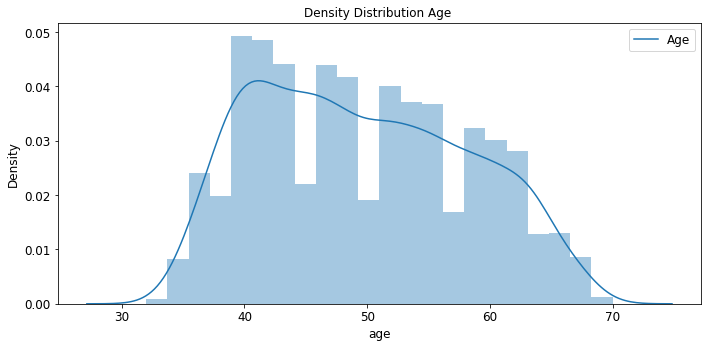

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.distplot(df2['age'], kde_kws={"label": "Age"})
plt.rcParams.update({'font.size': 12})
plt.legend(loc=0,fontsize=12)
plt.title('Density Distribution Age ', fontsize=12)
plt.tight_layout()
plt.show()

Question 2: Describe how you would design a dashboard (including types of visualizations and
metrics) to profile this data at a high level?

Answer: 
For designing a dashboard I will use tools like Tableau or powerBi. I will include visulaization which shows relationship, distribution and composition/comparison of data.

For showing composition of data I will use bar graphs/histograms to show the patient counts on the basis of demographics or medical condition such as diabetes or prevalent stroke. I will do some distributions plot or sactterplot between features like age and bmi or age and cholestral value to show the relationship/pattern present in the dataset. Box plots between different features clearly shows patters in the data which will provide user to understand the relationship between the two features.(for example - diabetes and glucose - we can she glucose values are really high for the patients who has diabetes)


Question 3: Write a script to select patients who have diagnosis H35.35* (cystoid macular
degeneration) but have never had any documentation of visual disturbances (H53*) at
any time in their history?

Answer: While going through the data I didn't found any patient id to appear more than once. I also checked for all the person who are having H35.35* code had any other diagnosis codes but nothing was present. I have checked that the data set that I have received contains no duplicate patient id in any csv. But I tried to simulate the same scenario by adding some duplicate values in patient_clinical table and write a query to select data as per requirement.


```
select * from patient_clinical where diagnosis_code like 'H35.35%'
```




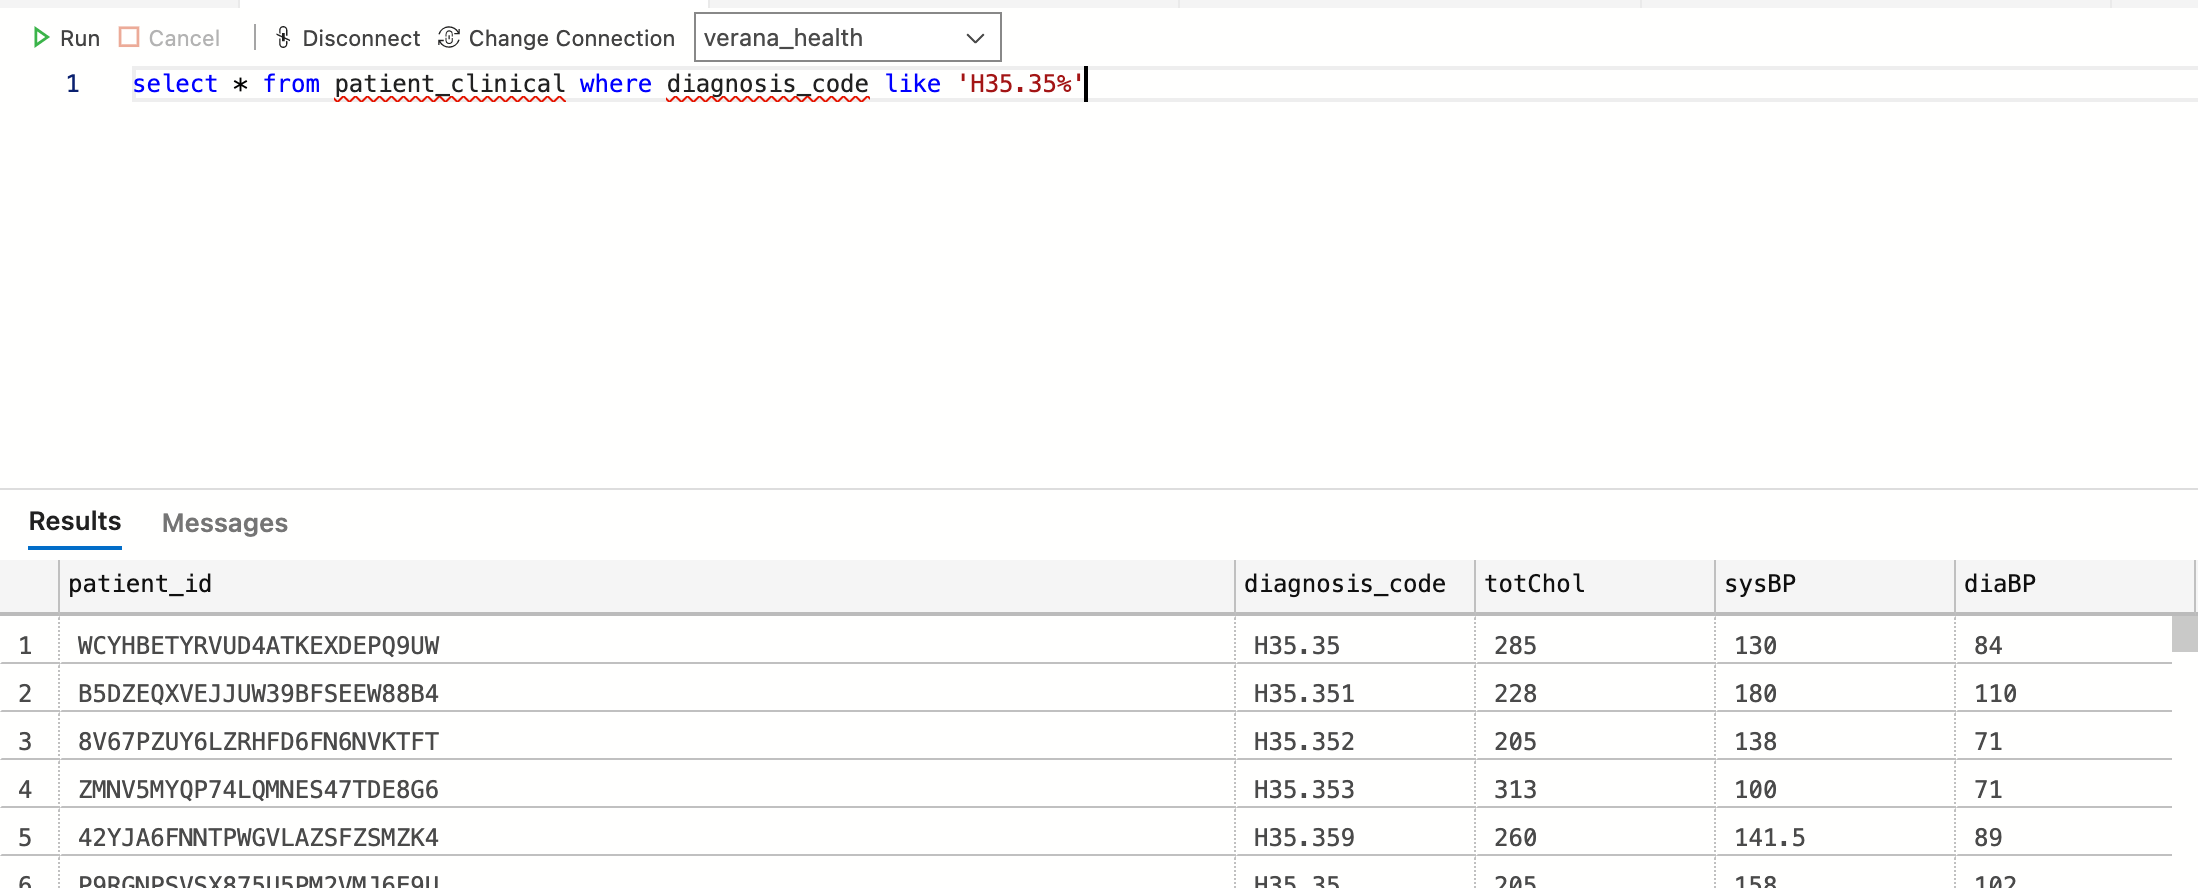

For this scenario I generated my own new table by inserting some duplicates rows in the database with required diadnosis code

In this scenario I first found all the patients who had diagnosis code were H35.35* then using those patients id I select all records of those patients and filtered those patients where diagnosis code matched H35* which gave me the patients who had both H35* and H35.35* as diagnosis code. Then select patients only those patients whiche were having diagnosis code H35.35* except the patients which I found earlier which had both the diagnosis codes.



```
select * from patient_clinical_4 where diagnosis_code like 'H35.35%' 
EXCEPT 
(select * from patient_clinical_4 where patient_id in 
    (select patient_id from patient_clinical_4 where diagnosis_code like 'H35.35%') 
and  diagnosis_code like 'H53%')
```



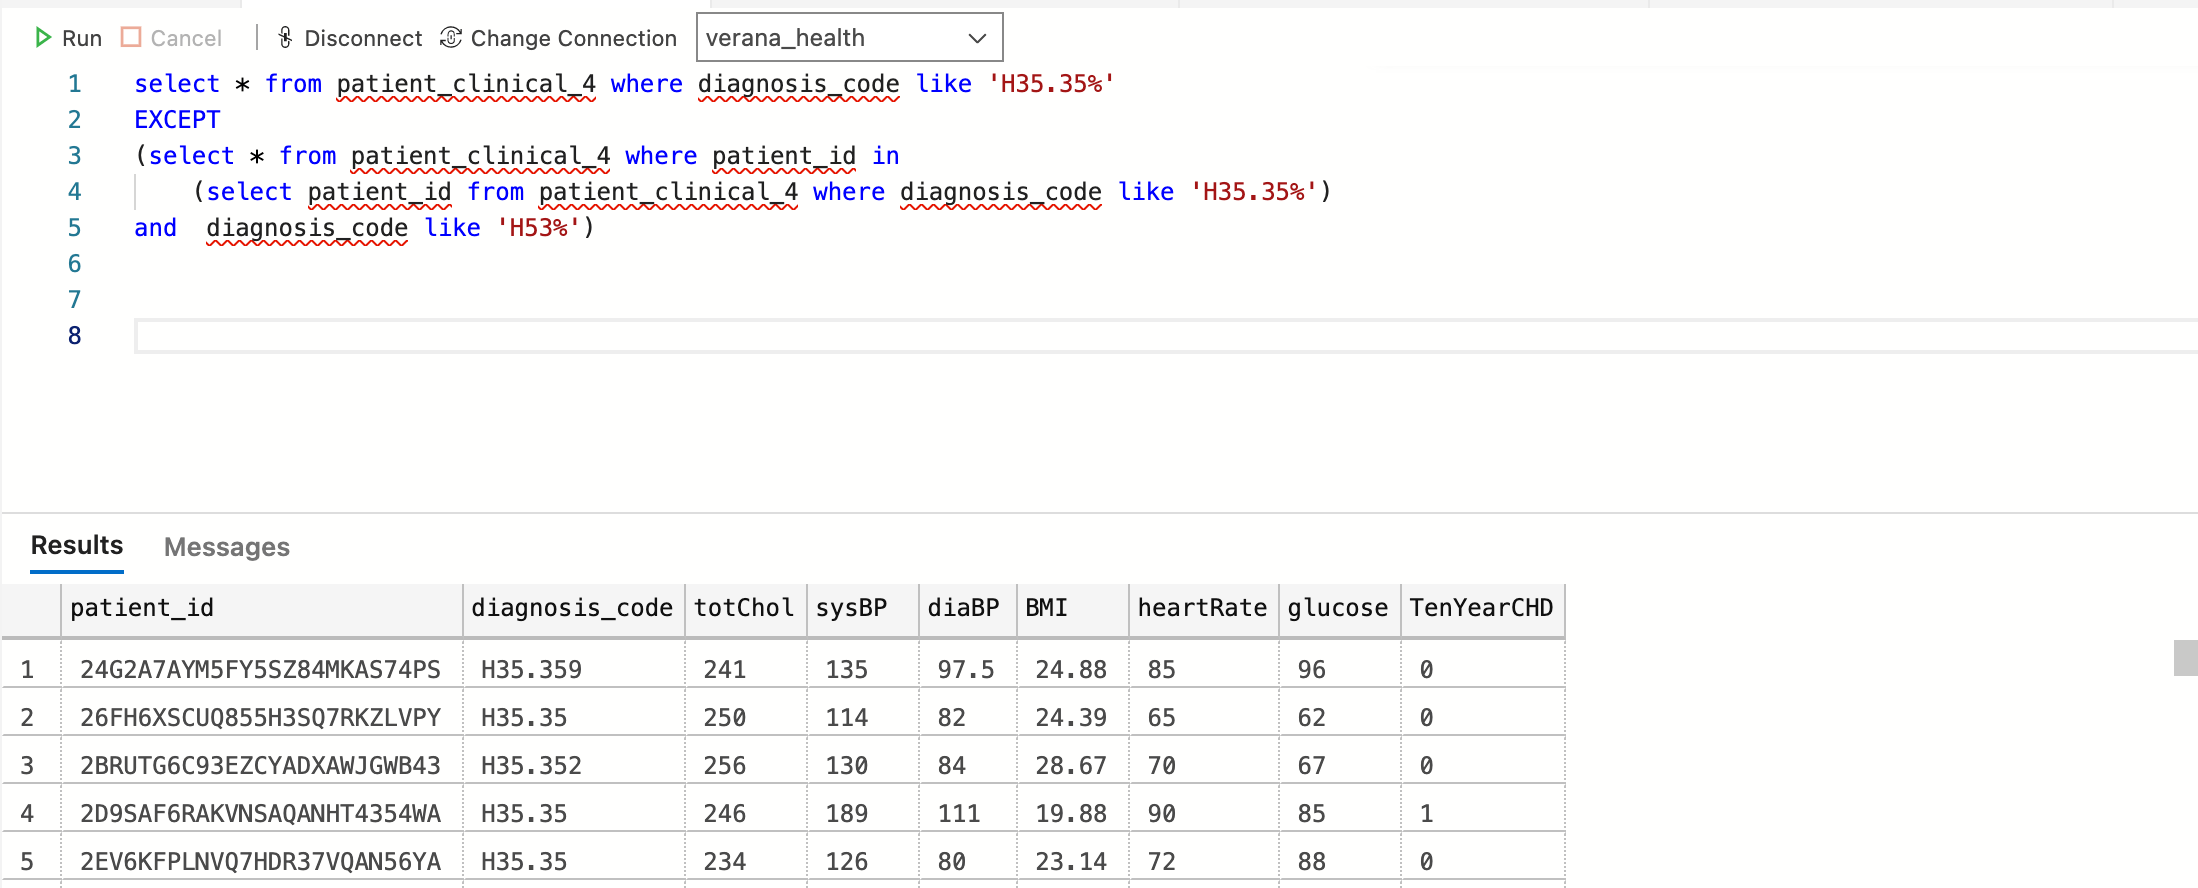

Question 4 : Medical Device Company A comes to us and wants to find out how many patients with diabetes are under 75, have the following diagnostic codes: 408850009, 232063007, 232053004, a total Cholesterol reading between 185 and 230, and a diastolic blood pressure reading of over 100?

Answer : I first performed joins between patient_history, patient_demographics and patient_clinical table on patient_id and then used appropriate where conditions to fitler the data as per the need which gave me that there is no patient matching all the conditions.

```
SELECT count(ph.patient_id) as 'Patient Count'
FROM patient_history ph
INNER JOIN patient_demographics pd ON ph.patient_id=pd.patient_id 
INNER JOIN patient_clinical pc ON pc.patient_id=pd.patient_id 
where ph.diabetes=1 and pd.age<75 
and  (pc.diagnosis_code = '408850009' or pc.diagnosis_code= '232063007' or pc.diagnosis_code = '232053004' )
and pc.diaBP >100 and (pc.totChol BETWEEN 185 and 230)
```





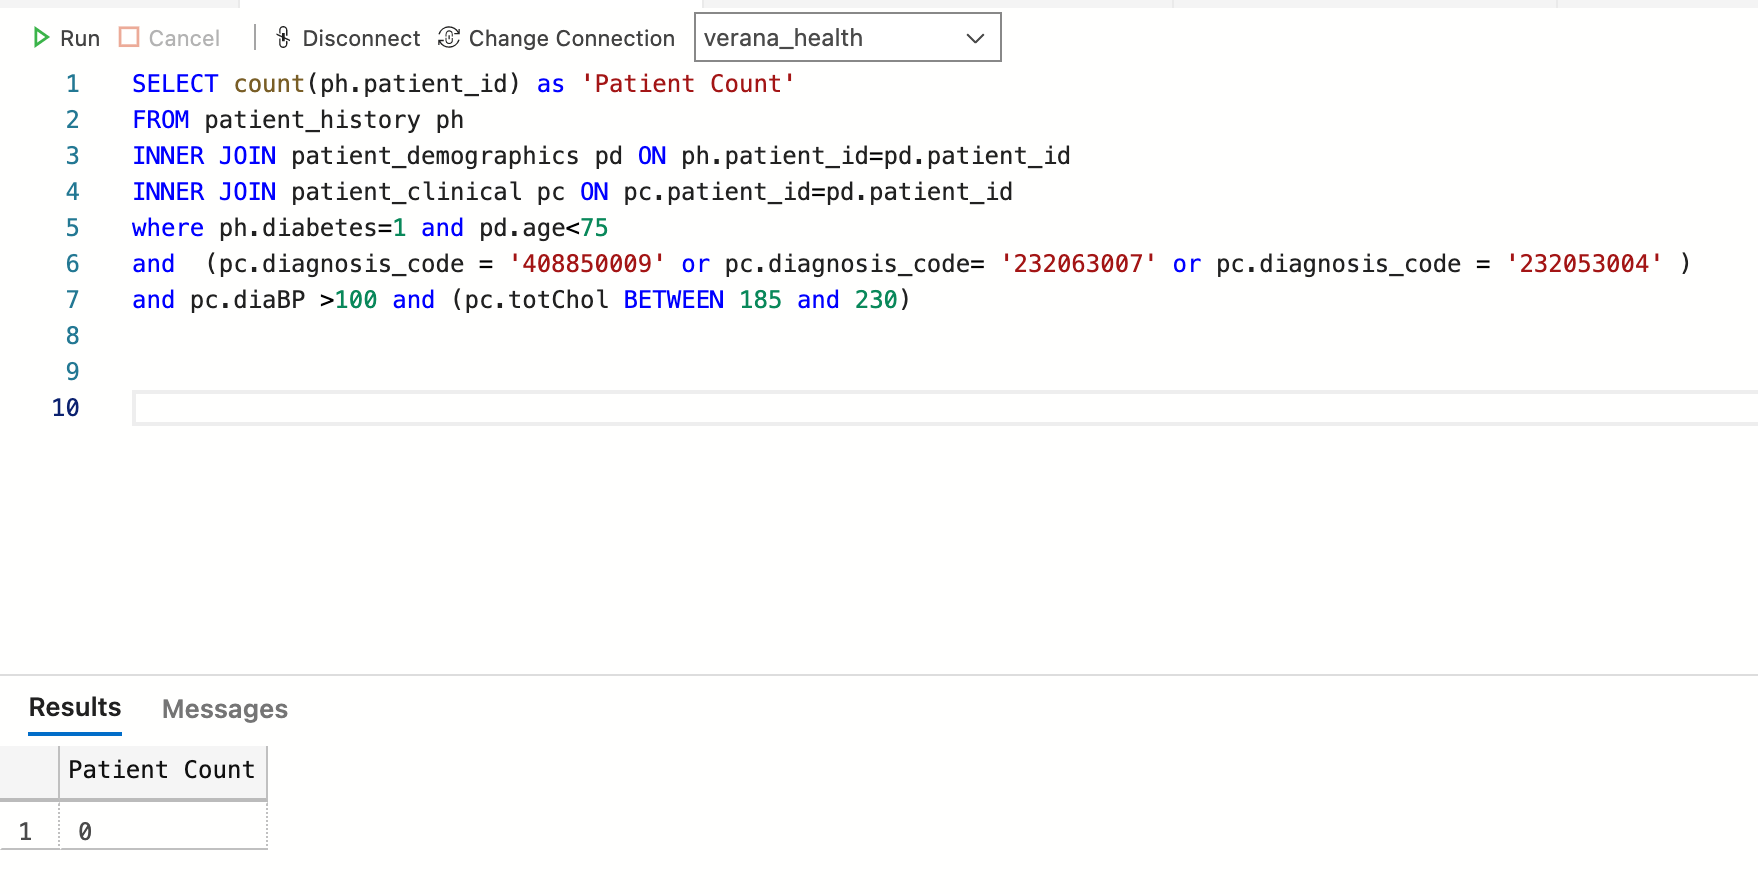

Question 5: Pharma Co. Z has a product on the market to prevent heart attacks. They want to study
patients who complain of signs of heart attacks to their doctors. Specifically, they are
interested in knowing how many patients complaining of pain, fluttering, pressure or
tightness in their chest have that documented in the notes on their record. Write code for
and provide counts of how many unique patients match this criteria. Write a short
summary to the client communicating what you did. If we wanted to recommend a more
advanced text search, what would you suggest doing?

Answer : I have filtered the data using two approaches to filter that data as per the given keywords present in the notes of patients records. 

Assumption Taken : Note taken by physician "patient reports fluttering and irregular pain" is assumed to be related to chest pain.

Approach 1: 
This is more general or fundamental approcah where we have found those unique notes which contains the keywords like pain, fluttering, pressure or tightness in their chest and then are selecting only those patients which had these phrases in their notes and then counted the results.

Approach 2:
This is more advance approach where we create regular expression or a pattern of string of keywords which is used to match the data in notes column and then we count the results.


In [ ]:
#Approach 1 
patient_note_df_result = patient_note_df.loc[(patient_note_df['Note'] == 'PRO: tightness in chest') | (patient_note_df['Note'] == 'patient reports being out of breath, feeling pain in the chest') | (patient_note_df['Note'] == 'patient reports feeling pressure in the chest off and on') | (patient_note_df['Note'] == 'patient reports fluttering and irregular pain') | (patient_note_df['Note'] == 'chest pain')]
print("Total Number of patients is :",patient_note_df_result.shape[0])

Total Number of patients is : 805


In [ ]:
#Approach 2
patient_note_df_result = patient_note_df.loc[patient_note_df['Note'].str.contains(r'(?=.*\bchest\b)(?=.*\bpain\b).*|fluttering|pressure|tightness', case=False)]
print("Total Number of patients is :",patient_note_df_result.shape[0])

Total Number of patients is : 805


Question 6: Pharma Co. Z has a couple of follow-up questions after seeing the results of their
previous inquiry.

a. How many patients are male, have diagnoses: 232065000 or H35.52, and the physician noted the patient complains of pain, fluttering, pressure or tightness in
their chest?


I am using the result data frame of question 5 in this question

In [ ]:
#Merging patient_demographics_df , patient_note_df_result(created in question 5) and patient_clinical_df into a single dataframe to create a single dataframe

df1 = patient_note_df_result.merge(patient_demographics_df, on='patient_id')
df2 = df1.merge(patient_clinical_df, on='patient_id')
# Selecting data on the basis of provided conditions in question
df3 = df2.loc[((df2['diagnosis_code']=='232065000') | (df2['diagnosis_code']=='H35.52') )& df2['male']==1]
print("Total Number of patients is :",df3.shape[0])

Total Number of patients is : 10


b. How many patients with either of the two diagnoses might have experienced
those symptoms, but cannot be confirmed using this data? Write 1-2 sentences
for Pharma Co. Z about why this might be the case.

Answer: H35.52 is a to specify a diagnosis of pigmentary retinal dystrophy but the patients who were diagnosed with this disoder reported pain feeling pressure in the chest off and on that is why we cannot confirm the symptoms or diagnosis for these patients. 

Question 7: Are the distributions of cholesterol values different for smokers vs. non-smokers? Create
a visualization to display this.

Answer : No, the distribution of cholesterol values for smokers vs non-smokers almost overlaps each other hence we cannot say that values are different.

In [ ]:
# Merging patient_clinical_df and patient_history_df together
df1 = patient_history_df.merge(patient_clinical_df, on='patient_id')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


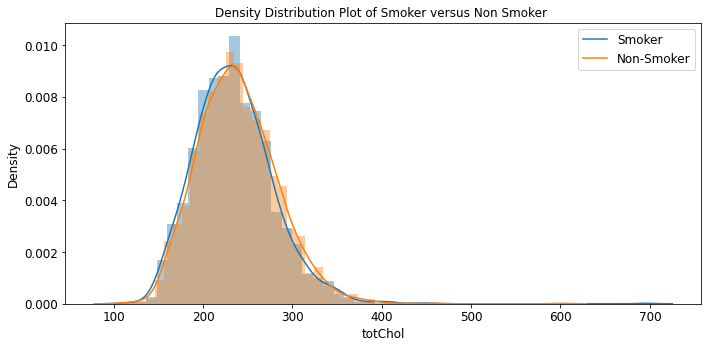

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.distplot(df1[df1['currentSmoker'] == 1]['totChol'], kde_kws={"label": "Smoker"})
sns.distplot(df1[df1['currentSmoker'] == 0]['totChol'], kde_kws={"label": "Non-Smoker"})
plt.rcParams.update({'font.size': 12})
plt.legend(loc=0,fontsize=12)
plt.title('Density Distribution Plot of Smoker versus Non Smoker ', fontsize=12)
plt.tight_layout()
plt.show()